In [77]:
import pandas as pd
import re
import datetime
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from numpy import nan
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import shap
import warnings
warnings.filterwarnings('ignore')

In [95]:
df = pd.read_csv('class_4_final_project_data.csv')
df.head(10)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178.0,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125.0,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028.0,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136.0,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074.0,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053.0,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003.0,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198.0,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146.0,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038.0,47.3684,-122.031,2390,7570


In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21543 non-null  float64
 17  lat            21613 non-null  float64
 18  long  

In [60]:
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode          70
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [61]:
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode          70
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [62]:
df.shape

(21613, 21)

In [86]:
df['id'].duplicated().sum()

177

In [94]:
df['sqft_living15'].nunique()

777

In [65]:
df['id'].duplicated().sum()

177

In [66]:
df['price'].min()

75000.0

In [67]:
df['price'].max()

7700000.0

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

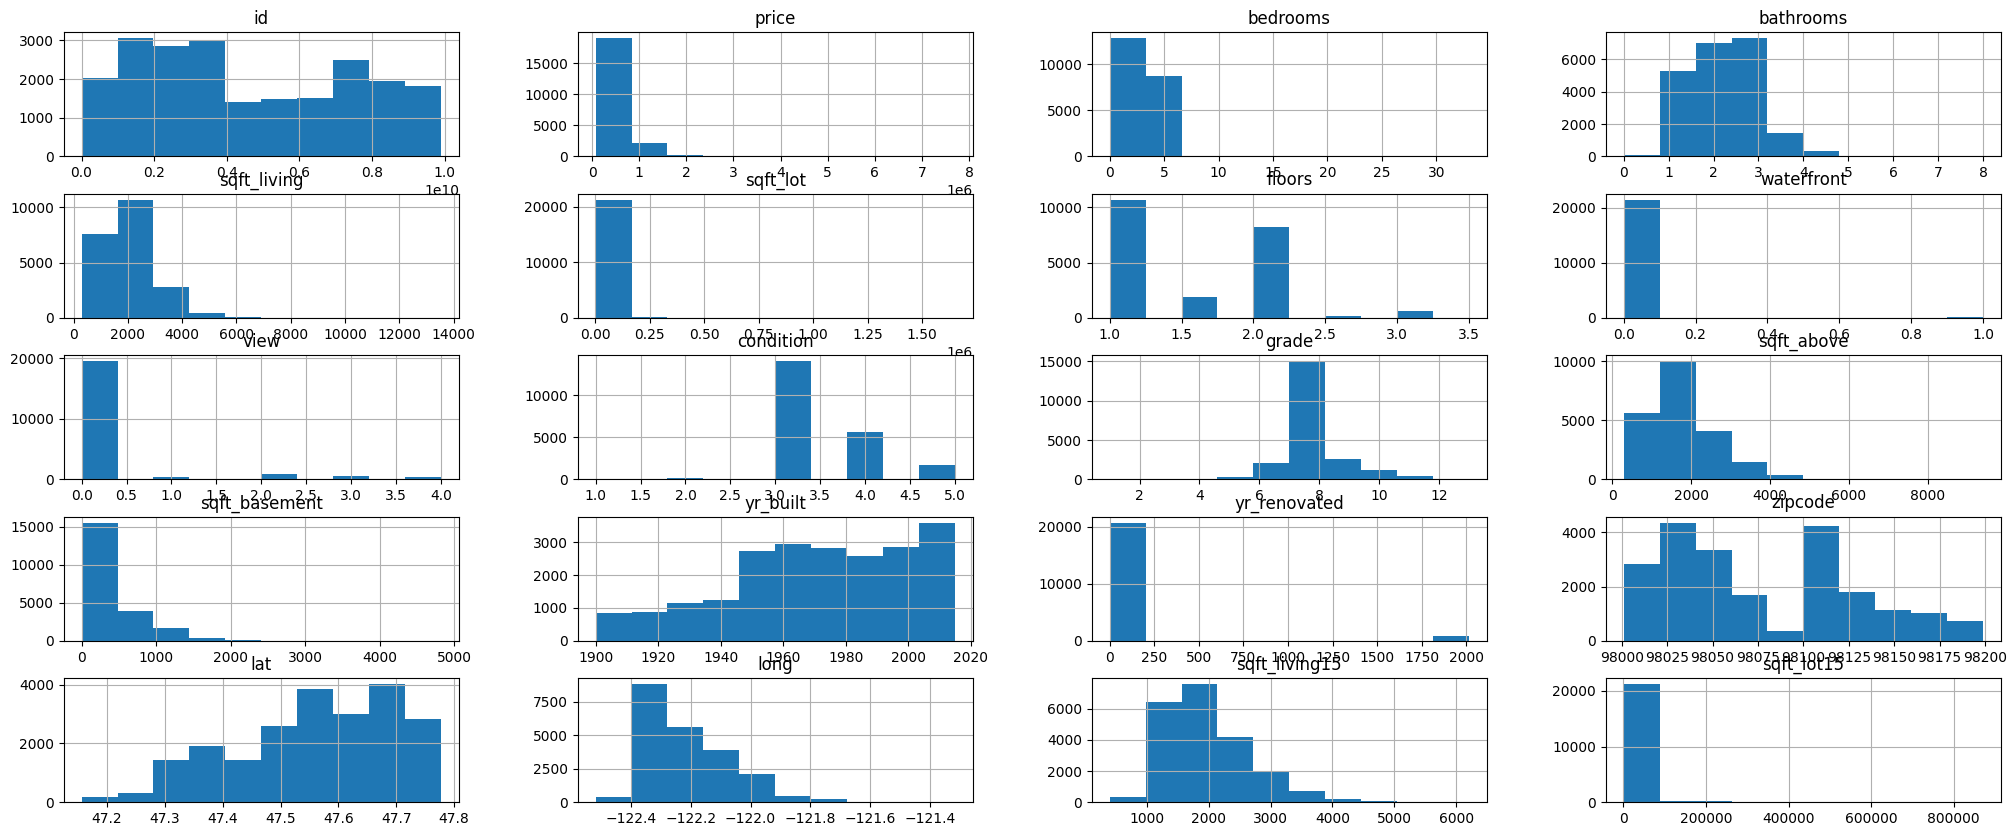

In [68]:
df.hist(figsize=(25,10))

In [69]:
ysf_columns= ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition','grade','price'] 

df_ysf = df[ysf_columns]
df_ysf.corr()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,price
bedrooms,1.000000,0.515884,0.175429,-0.006582,0.079532,0.028472,0.356967,0.308350
bathrooms,0.515884,1.000000,0.500653,0.063744,0.187737,-0.124982,0.664983,0.525138
floors,0.175429,0.500653,1.000000,0.023698,0.029444,-0.263768,0.458183,0.256794
waterfront,-0.006582,0.063744,0.023698,1.000000,0.401857,0.016653,0.082775,0.266369
view,0.079532,0.187737,0.029444,0.401857,1.000000,0.045990,0.251321,0.397293
condition,0.028472,-0.124982,-0.263768,0.016653,0.045990,1.000000,-0.144674,0.036362
grade,0.356967,0.664983,0.458183,0.082775,0.251321,-0.144674,1.000000,0.667434
price,0.308350,0.525138,0.256794,0.266369,0.397293,0.036362,0.667434,1.000000


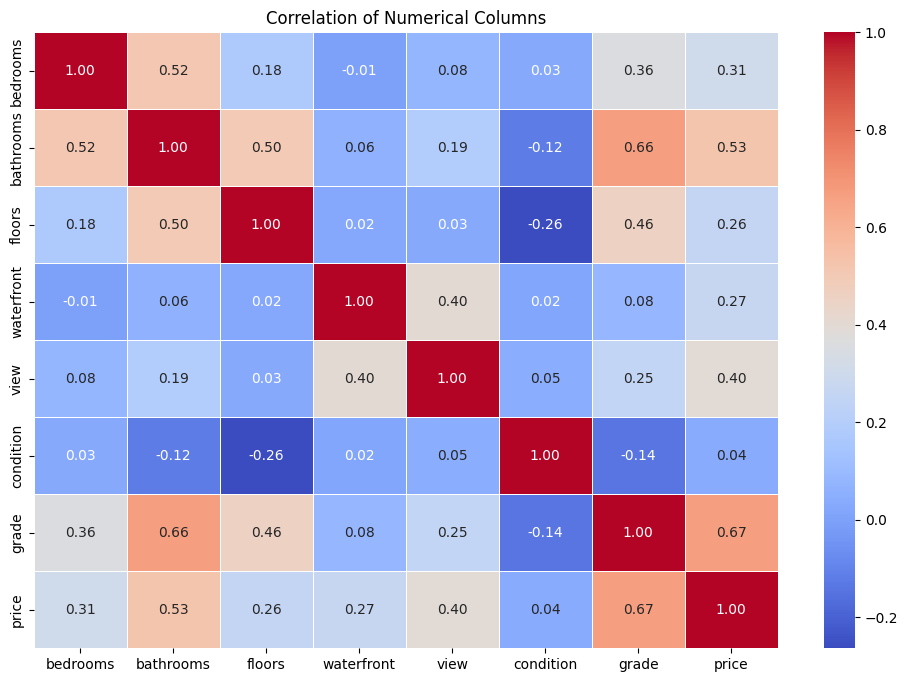

In [70]:
# Calculate the correlation matrix
correlation_matrix = df_ysf.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation of Numerical Columns')
plt.show()

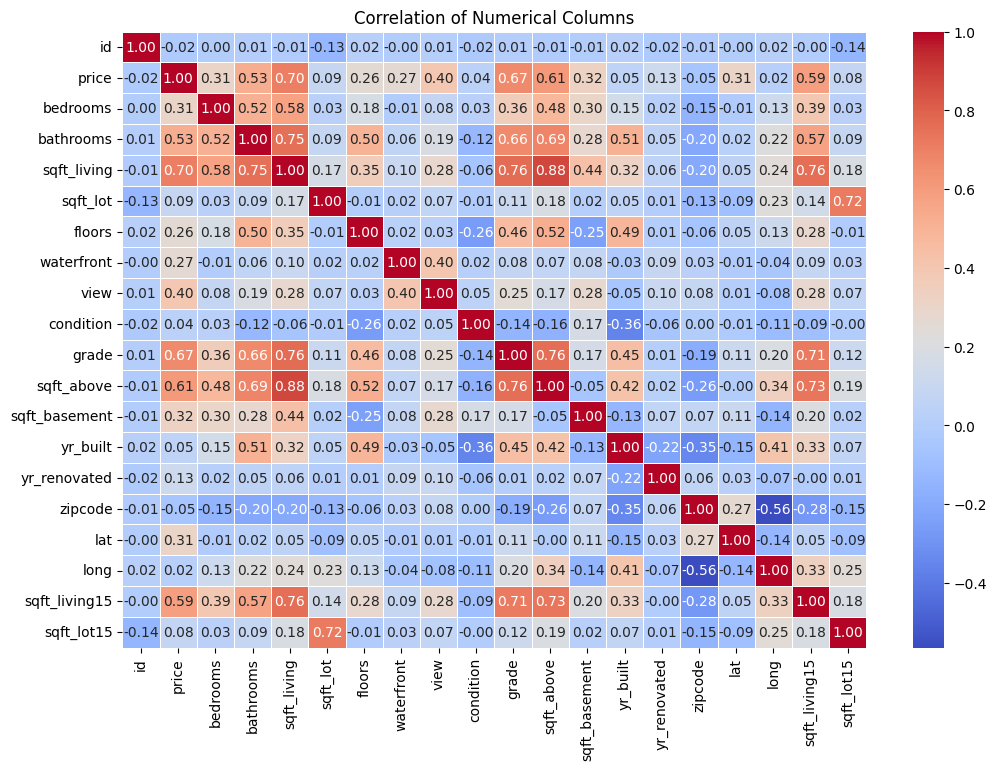

In [98]:
# Calculate the correlation matrix
correlation_matrix = df.drop(columns='date').corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation of Numerical Columns')
plt.show()

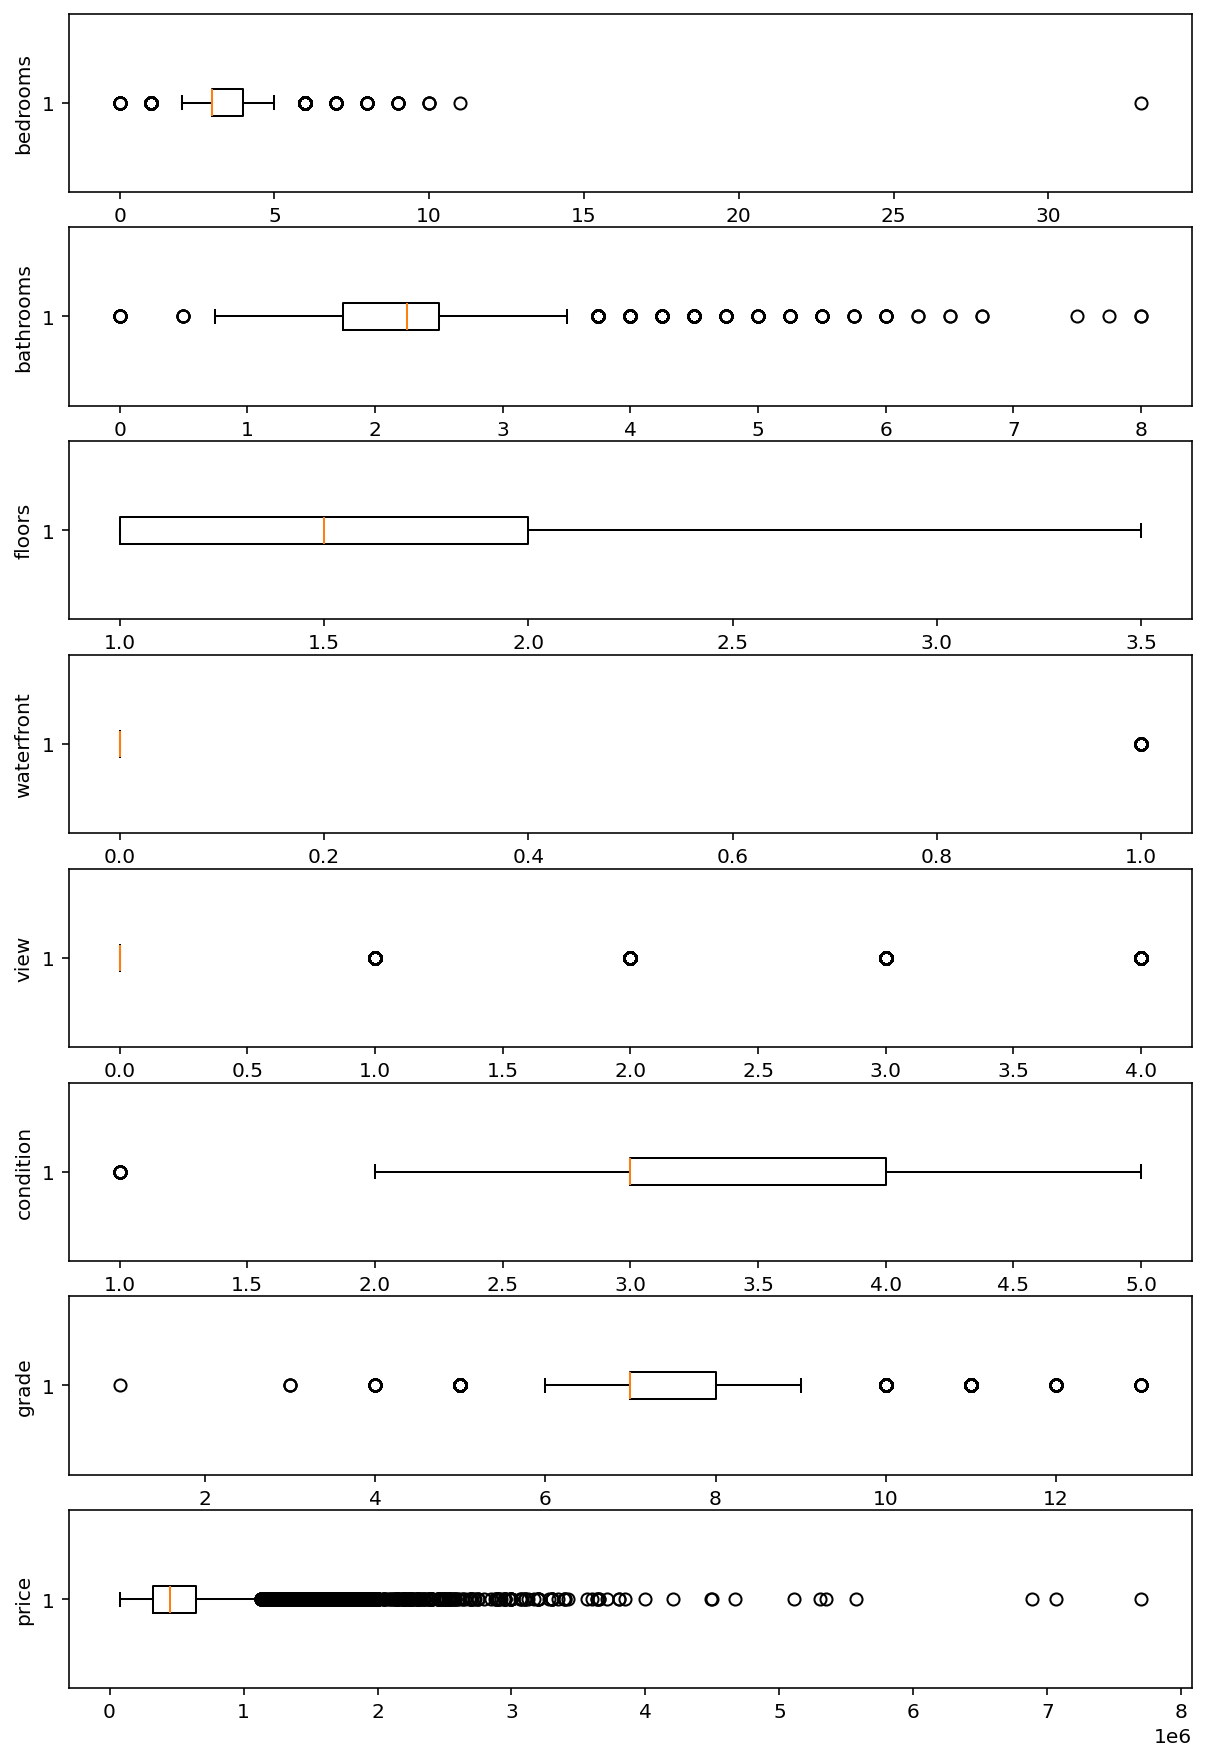

In [71]:
# Box Plots
fig, axs = plt.subplots(8,1,dpi=145, figsize=(10,15))
i = 0
for col in df_ysf.columns:
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1 
plt.show()

In [72]:
# Select numerical columns from the DataFrame
all_num_cols = df.select_dtypes(include='number').columns

# Display the numerical column names
df[all_num_cols].corr()



,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008609,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053419,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.153033,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.204242,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199813,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129414,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059297,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030286,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084840,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003081,-0.014941,-0.106500,-0.092824,-0.003406


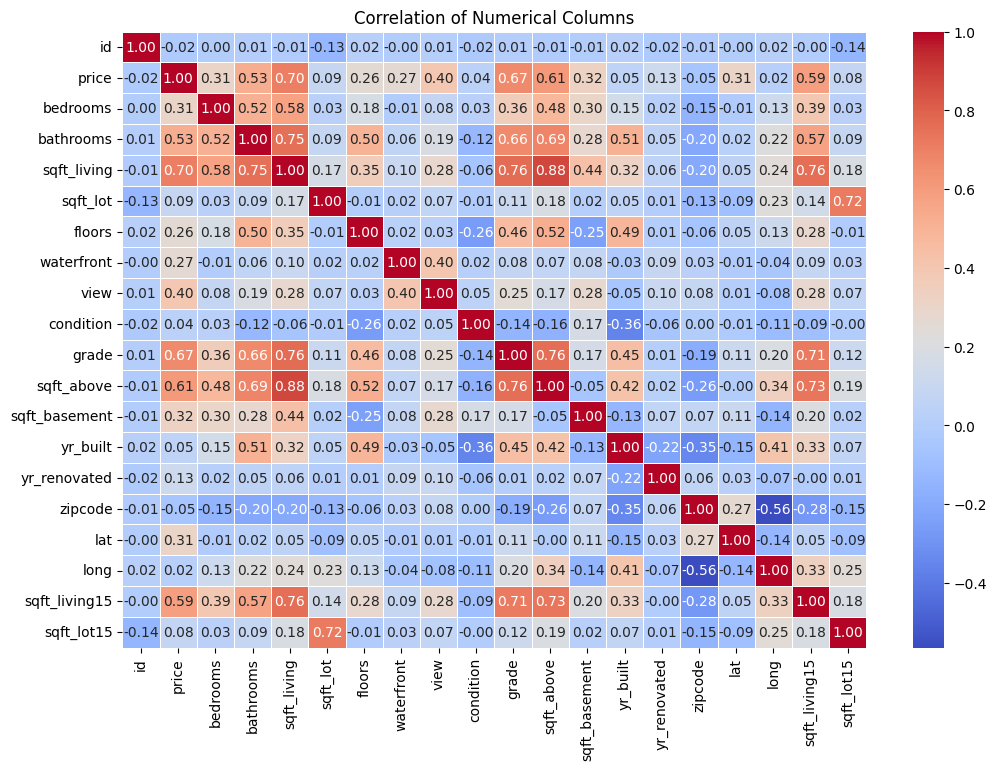

In [73]:
# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df[all_num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation of Numerical Columns')
plt.show()

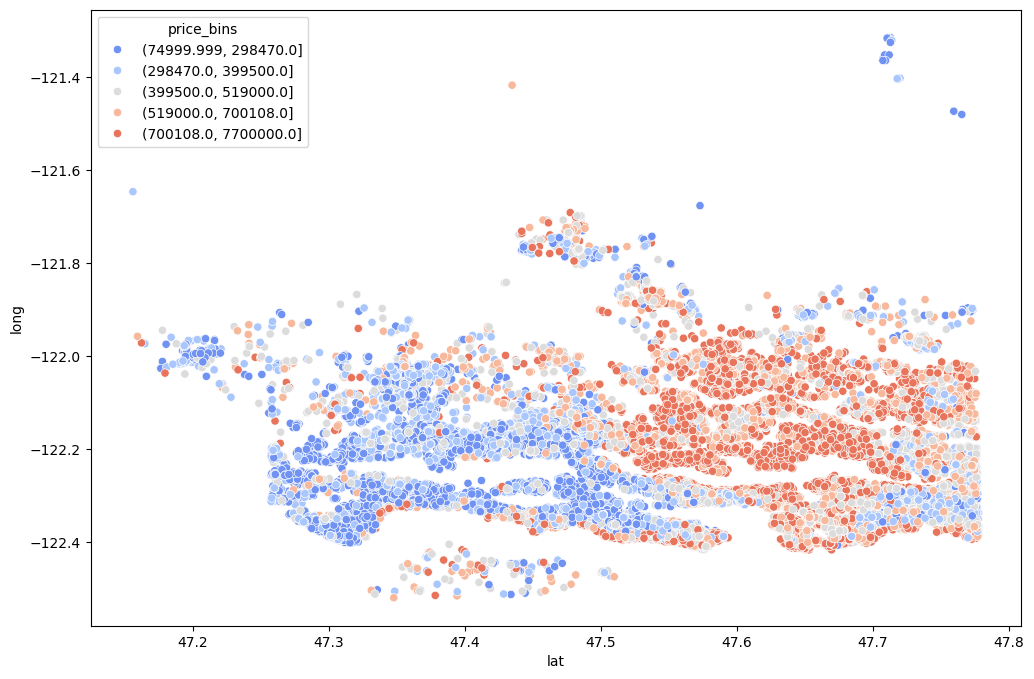

In [74]:
# Create price bins 
df['price_bins'] = pd.qcut(df['price'], q=5)  # Divide the price by 5 according to counts

# Crate scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='lat', y='long', data=df, hue='price_bins', palette='coolwarm')
plt.show()

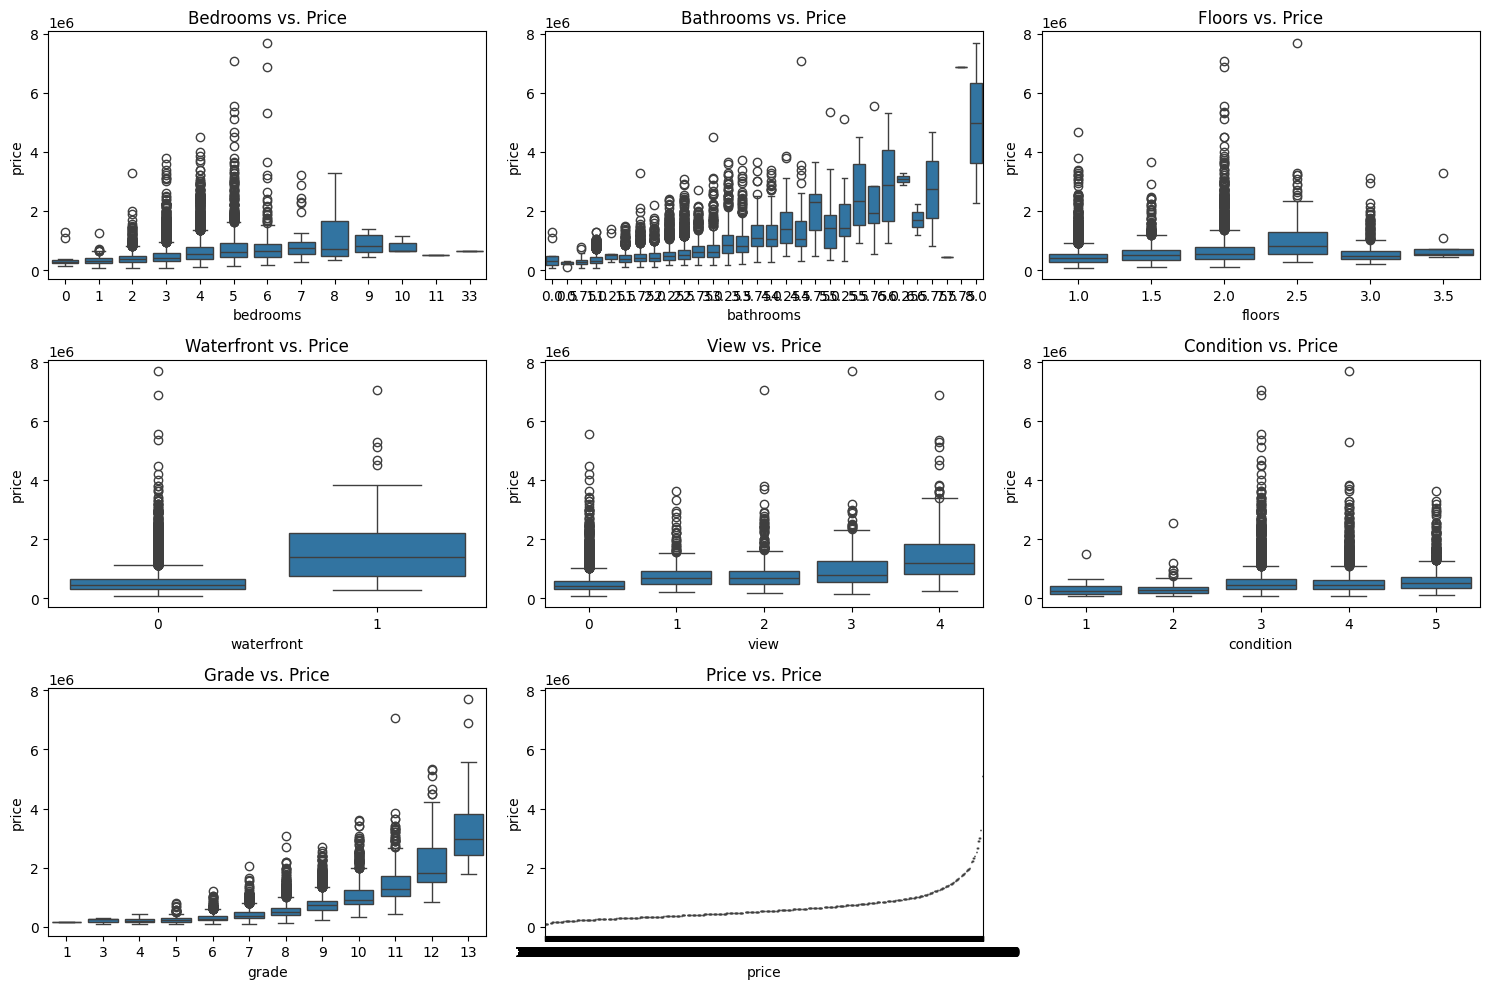

In [49]:
# Box plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(ysf_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[column], y=df['price'])
    plt.title(f'{column.capitalize()} vs. Price')

plt.tight_layout()
plt.show()


In [75]:
df_ysf

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,price
0,3,1.00,1.0,0,0,3,7,221900.0
1,3,2.25,2.0,0,0,3,7,538000.0
2,2,1.00,1.0,0,0,3,6,180000.0
3,4,3.00,1.0,0,0,5,7,604000.0
4,3,2.00,1.0,0,0,3,8,510000.0
...,...,...,...,...,...,...,...,...
21608,3,2.50,3.0,0,0,3,8,360000.0
21609,4,2.50,2.0,0,0,3,8,400000.0
21610,2,0.75,2.0,0,0,3,7,402101.0
21611,3,2.50,2.0,0,0,3,8,400000.0


In [79]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Bağımsız ve bağımlı değişkenleri ayırma
X = df_ysf.drop(columns=['price'])
y = df_ysf['price']

# Veriyi eğitim ve test setlerine bölmek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ölçeklendirme işlemi
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model eğitimi ve testi
models = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Logistic Regression": LogisticRegression(),
}

# Polynomial Regression için pipeline oluşturalım
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
models["Polynomial Regression"] = poly_model

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
    r2 = model.score(X_test_scaled, y_test)
    print(f"{name}: RMSE = {rmse}, R2 Score = {r2}")


Linear Regression: RMSE = 259018.29694182263, R2 Score = 0.5562115543520207
SVR: RMSE = 400813.6523582296, R2 Score = -0.06267414814385508
Lasso Regression: RMSE = 259018.35126155987, R2 Score = 0.5562113682147898
Ridge Regression: RMSE = 259019.02033264018, R2 Score = 0.5562090755083359
Random Forest Regressor: RMSE = 257168.57310419326, R2 Score = 0.5625273628118128
Decision Tree Regressor: RMSE = 280814.95791567786, R2 Score = 0.4783783863800266
Logistic Regression: RMSE = 310580.0633854056, R2 Score = 0.010178117048346057
Polynomial Regression: RMSE = 235783.9623624413, R2 Score = 0.6322576666909114


In [80]:
df_ysf

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,price
0,3,1.00,1.0,0,0,3,7,221900.0
1,3,2.25,2.0,0,0,3,7,538000.0
2,2,1.00,1.0,0,0,3,6,180000.0
3,4,3.00,1.0,0,0,5,7,604000.0
4,3,2.00,1.0,0,0,3,8,510000.0
...,...,...,...,...,...,...,...,...
21608,3,2.50,3.0,0,0,3,8,360000.0
21609,4,2.50,2.0,0,0,3,8,400000.0
21610,2,0.75,2.0,0,0,3,7,402101.0
21611,3,2.50,2.0,0,0,3,8,400000.0


In [87]:
# Calculate the Interquartile Range (IQR)
Q1_bedrooms = df_ysf['bedrooms'].quantile(0.25)
Q3_bedrooms = df_ysf['bedrooms'].quantile(0.75)
IQR_bedrooms = Q3_bedrooms - Q1_bedrooms

Q1_bathrooms = df_ysf['bathrooms'].quantile(0.25)
Q3_bathrooms = df_ysf['bathrooms'].quantile(0.75)
IQR_bathrooms = Q3_bathrooms - Q1_bathrooms

Q1_condition = df_ysf['condition'].quantile(0.25)
Q3_condition = df_ysf['condition'].quantile(0.75)
IQR_condition = Q3_condition - Q1_condition

Q1_grade = df_ysf['grade'].quantile(0.25)
Q3_grade = df_ysf['grade'].quantile(0.75)
IQR_grade = Q3_grade - Q1_grade

# Calculate the lower and upper bounds for outlier detection
lower_bound_bedrooms = Q1_bedrooms - 1.5 * IQR_bedrooms
upper_bound_bedrooms = Q3_bedrooms + 1.5 * IQR_bedrooms

lower_bound_bathrooms = Q1_bathrooms - 1.5 * IQR_bathrooms
upper_bound_bathrooms = Q3_bathrooms + 1.5 * IQR_bathrooms

lower_bound_condition = Q1_condition - 1.5 * IQR_condition
upper_bound_condition = Q3_condition + 1.5 * IQR_condition

lower_bound_grade = Q1_grade - 1.5 * IQR_grade
upper_bound_grade = Q3_grade + 1.5 * IQR_grade

# Identify outliers
outliers_lower_bedrooms = df_ysf['bedrooms'] < lower_bound_bedrooms
outliers_upper_bedrooms = df_ysf['bedrooms'] > upper_bound_bedrooms

outliers_lower_bathrooms = df_ysf['bathrooms'] < lower_bound_bathrooms
outliers_upper_bathrooms = df_ysf['bathrooms'] > upper_bound_bathrooms

outliers_lower_condition = df_ysf['condition'] < lower_bound_condition
outliers_upper_condition = df_ysf['condition'] > upper_bound_condition

outliers_lower_grade = df_ysf['grade'] < lower_bound_grade
outliers_upper_grade = df_ysf['grade'] > upper_bound_grade

# Adjust values lower than the lower bound to the lower bound
df_ysf.loc[outliers_lower_bedrooms, 'bedrooms'] = lower_bound_bedrooms
df_ysf.loc[outliers_upper_bedrooms, 'bedrooms'] = upper_bound_bedrooms

df_ysf.loc[outliers_lower_bathrooms, 'bathrooms'] = lower_bound_bathrooms
df_ysf.loc[outliers_upper_bathrooms, 'bathrooms'] = upper_bound_bathrooms

df_ysf.loc[outliers_lower_condition, 'condition'] = lower_bound_condition
df_ysf.loc[outliers_upper_condition, 'condition'] = upper_bound_condition

df_ysf.loc[outliers_lower_grade, 'grade'] = lower_bound_grade
df_ysf.loc[outliers_upper_grade, 'grade'] = upper_bound_grade


In [88]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Bağımsız ve bağımlı değişkenleri ayırma
X = df_ysf.drop(columns=['price'])
y = df_ysf['price']

# Veriyi eğitim ve test setlerine bölmek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ölçeklendirme işlemi
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model eğitimi ve testi
models = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Logistic Regression": LogisticRegression(),
}

# Polynomial Regression için pipeline oluşturalım
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
models["Polynomial Regression"] = poly_model

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
    r2 = model.score(X_test_scaled, y_test)
    print(f"{name}: RMSE = {rmse}, R2 Score = {r2}")

Linear Regression: RMSE = 279888.6806782094, R2 Score = 0.481813882559576
SVR: RMSE = 400767.51060390036, R2 Score = -0.06242949167167633
Lasso Regression: RMSE = 279888.72998406657, R2 Score = 0.48181369998975665
Ridge Regression: RMSE = 279889.05891168513, R2 Score = 0.48181248203513716
Random Forest Regressor: RMSE = 252534.3673630705, R2 Score = 0.5781519140916904
Decision Tree Regressor: RMSE = 268947.21138932096, R2 Score = 0.521536078974945
Logistic Regression: RMSE = 277317.758698061, R2 Score = 0.00994679620633819
Polynomial Regression: RMSE = 254693.70221084775, R2 Score = 0.5709069143159258


#Eski veriler
Linear Regression: RMSE = 259018.29694182263, R2 Score = 0.5562115543520207
SVR: RMSE = 400813.6523582296, R2 Score = -0.06267414814385508
Lasso Regression: RMSE = 259018.35126155987, R2 Score = 0.5562113682147898
Ridge Regression: RMSE = 259019.02033264018, R2 Score = 0.5562090755083359
Random Forest Regressor: RMSE = 257168.57310419326, R2 Score = 0.5625273628118128
Decision Tree Regressor: RMSE = 280814.95791567786, R2 Score = 0.4783783863800266
Logistic Regression: RMSE = 310580.0633854056, R2 Score = 0.010178117048346057
Polynomial Regression: RMSE = 235783.9623624413, R2 Score = 0.6322576666909114